# Importing Libraries

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import pickle

## Exploring Dataset

Dataset link - <a href="https://www.kaggle.com/jassican/house-price-prediction-challenge-machine-hack"> Kaggle Dataset Link </a>

In [193]:
df = pd.read_csv("Real estate.csv")

In [194]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [195]:
X = df.iloc[:,2:-1]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [196]:
y = df.iloc[:,[-1]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


### Splitting the dataset

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape,X_test.shape)

(289, 5) (125, 5)


In [198]:
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [199]:
y_train.shape

(289, 1)

### Adding polynomial features

In [200]:
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

(289, 252)


### Feature Scaling

In [171]:
sc = StandardScaler()
sc.fit(X_train_poly)
X_train_scaled = sc.transform(X_train_poly)
X_test_scaled = sc.transform(X_test_poly)

In [172]:
X_train_scaled[:5]

array([[ 0.        , -0.52538576,  0.27588065, ..., -0.91168358,
        -0.29250993,  0.96880802],
       [ 0.        ,  0.30050663, -0.43882576, ...,  0.39491298,
         0.39262006,  0.28773346],
       [ 0.        ,  1.28817176, -0.5524233 , ...,  0.33092044,
         0.47661074,  0.63369133],
       [ 0.        , -1.16396235,  0.93969586, ..., -0.91237919,
        -1.20317102, -1.45343553],
       [ 0.        , -0.44024221, -0.39714043, ...,  1.44427863,
         1.28847898,  0.66161565]])

## Training

In [173]:
model = Ridge(alpha=10)
model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [174]:
train_score = model.score(X_train_scaled,y_train)
print("Train Score:", train_score)

Train Score: 0.7018302354621234


In [175]:
test_score = model.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Test Score: 0.6429379953807662


### Hyper parameter Tuning

In [176]:
params = {}
params['degree'] = [1,2,3,4,5,6,7,8,9,10]
params['alpha'] = [0.01,0.1,10,50]

In [201]:
def fit(X_train_scaled,y_train,test_scaled,y_test,degree,alpha,grid_search=False,exp_name=None):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled =  sc.transform(X_train_poly)
    X_test_scaled = sc.transform(X_test_poly)
    
    model = Ridge(alpha)
    model.fit(X_train_scaled,y_train)
    
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    
    if grid_search:
        scores = [exp_name, degree, alpha, train_score, test_score]
        return scores
    else:
        print("Train Score:", train_score)
        print("Test Score:", test_score)
        return model,poly,sc
        

In [202]:
from tqdm.notebook import tqdm

In [203]:
result = []
exp_id = 1
for i in tqdm(range(len(params['degree']))):
    degree = params['degree'][i]
    for j in range(len(params['alpha'])):
        
        alpha = params['alpha'][j]
        exp_name = 'exp '+str(exp_id)
        exp_id+=1
        result.append(fit(X_train_scaled,y_train,X_test_scaled,y_test,degree,
                          alpha,grid_search=True,exp_name=exp_name))
result    

  0%|          | 0/10 [00:00<?, ?it/s]

[['exp 1', 1, 0.01, 0.5746664876805919, 0.5347563861363389],
 ['exp 2', 1, 0.1, 0.5746664203651057, 0.5348000963378667],
 ['exp 3', 1, 10, 0.5741467834665381, 0.5389331577724679],
 ['exp 4', 1, 50, 0.5677630123438195, 0.5476512169367996],
 ['exp 5', 2, 0.01, 0.6666536333863029, 0.6351228740257489],
 ['exp 6', 2, 0.1, 0.6666352150442914, 0.6353112342493237],
 ['exp 7', 2, 10, 0.6587425812633139, 0.6394384506073284],
 ['exp 8', 2, 50, 0.6329287973092363, 0.6271383299855076],
 ['exp 9', 3, 0.01, 0.6802837875019521, 0.6574720854659855],
 ['exp 10', 3, 0.1, 0.6800258327010849, 0.6568215715909733],
 ['exp 11', 3, 10, 0.6692864214531571, 0.6360799795432275],
 ['exp 12', 3, 50, 0.659286624510077, 0.636124734965866],
 ['exp 13', 4, 0.01, 0.7009582574430349, 0.5694210751439032],
 ['exp 14', 4, 0.1, 0.6917913148879902, 0.6454840389131475],
 ['exp 15', 4, 10, 0.6748963380647048, 0.6502099015457821],
 ['exp 16', 4, 50, 0.6672993745801092, 0.6383573391893647],
 ['exp 17', 5, 0.01, 0.7200696565504228

In [204]:
result_df = pd.DataFrame(result,columns=['Experiment_Id','Degree','Alpha',
                                         'Train Score','Test Score'])
result_df

,Experiment_Id,Degree,Alpha,Train Score,Test Score
0,exp 1,1,0.01,0.574666,0.534756
1,exp 2,1,0.10,0.574666,0.534800
2,exp 3,1,10.00,0.574147,0.538933
3,exp 4,1,50.00,0.567763,0.547651
4,exp 5,2,0.01,0.666654,0.635123
5,exp 6,2,0.10,0.666635,0.635311
6,exp 7,2,10.00,0.658743,0.639438
7,exp 8,2,50.00,0.632929,0.627138
8,exp 9,3,0.01,0.680284,0.657472
9,exp 10,3,0.10,0.680026,0.656822


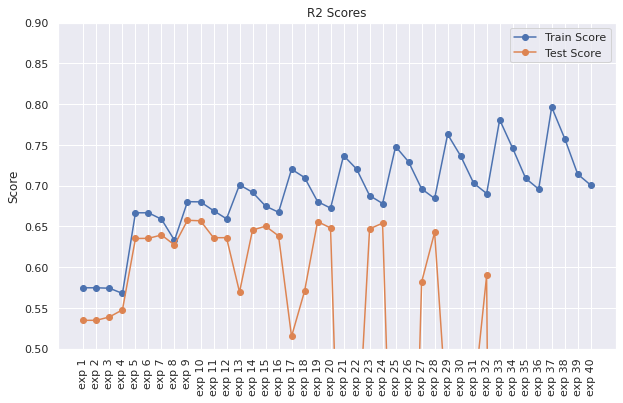

In [205]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title("R2 Scores")
plt.plot(result_df['Train Score'],marker='o',label='Train Score')
plt.plot(result_df['Test Score'],marker='o',label='Test Score')
plt.xticks(list(range(len(result_df))),result_df['Experiment_Id'],rotation=90)
plt.ylabel('Score')
plt.ylim((0.5,0.9))
plt.legend()
plt.show()

In [206]:
 result_df.sort_values(by="Test Score", ascending=False)

,Experiment_Id,Degree,Alpha,Train Score,Test Score
8,exp 9,3,0.01,0.680284,0.657472
9,exp 10,3,0.10,0.680026,0.656822
18,exp 19,5,10.00,0.680453,0.655916
23,exp 24,6,50.00,0.678040,0.653956
14,exp 15,4,10.00,0.674896,0.650210
19,exp 20,5,50.00,0.672355,0.648024
22,exp 23,6,10.00,0.687766,0.646973
13,exp 14,4,0.10,0.691791,0.645484
27,exp 28,7,50.00,0.684225,0.642744
6,exp 7,2,10.00,0.658743,0.639438


In [207]:
result_df.loc[result_df['Experiment_Id']=='exp 9']

,Experiment_Id,Degree,Alpha,Train Score,Test Score
8,exp 9,3,0.01,0.680284,0.657472


## Training the model on selected hyperparameters

In [208]:
best_model,poly,sc = fit(X_train_scaled,y_train,X_test_scaled,y_test,degree=5,alpha=10)


Train Score: 0.6804529088677465
Test Score: 0.6559159471177542


## Saving and Loading the model

In [209]:
import joblib
from pickle import dump

In [218]:
# joblib.dump(best_model, 'best_model')
# joblib.dump(poly, 'polynomial feature')
# joblib.dump(sc, 'scaler')

dump(best_model, open('best_model.pkl','wb'))
dump(poly,open('poly.pkl','wb'))
dump(sc,open('scaler.pkl','wb'))

In [187]:
from pickle import load

In [219]:
load_model = load(open('best_model.pkl','rb'))
poly = load(open('poly.pkl','rb'))
sc = load(open('scaler.pkl','rb'))

# load_model = joblib.load('best_model')
# poly = joblib.load('polynomial feature')
# sc = joblib.load('scaler')

## Deploying

In [220]:
def prediction(model,poly,sc):
    l=[]
    l.append(float(input('Enter House Age: ')))
    l.append(float(input('Distance to the nearest MRT station')))
    l.append(float(input('Number of convenience stores:')))
    l.append(float(input('Latitude:')))
    l.append(float(input('Longitude:')))
    arr = np.asarray([l])
    arr = poly.transform(arr)
    scaled_arr = sc.transform(arr)
    print("Price of the house per unit area: ", round(model.predict(scaled_arr)[0][0],2))

In [221]:
prediction(load_model,poly,sc)

Enter House Age: 19.5
Distance to the nearest MRT station306.59470
Number of convenience stores:9
Latitude:24.98034
Longitude:121.53951
Price of the house per unit area:  42.73


In [225]:
import sklearn
sklearn.__version__

'0.23.2'